# MNIST

## Ruido sal y pimienta

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU)
from imgaug import augmenters

# Load data
from keras.datasets import mnist
from keras.datasets import fashion_mnist
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# convert the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


noise = augmenters.SaltAndPepper(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

KeyboardInterrupt: 

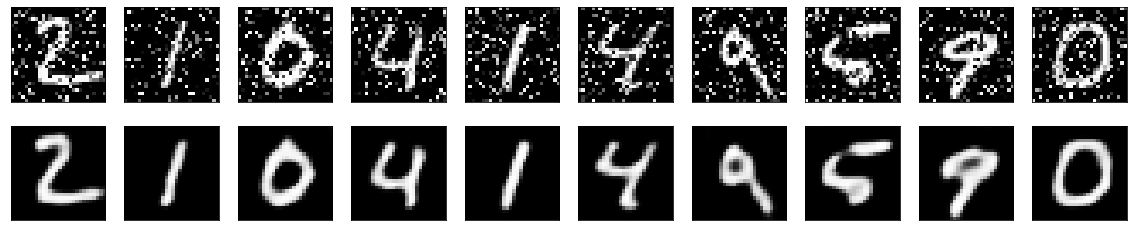

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

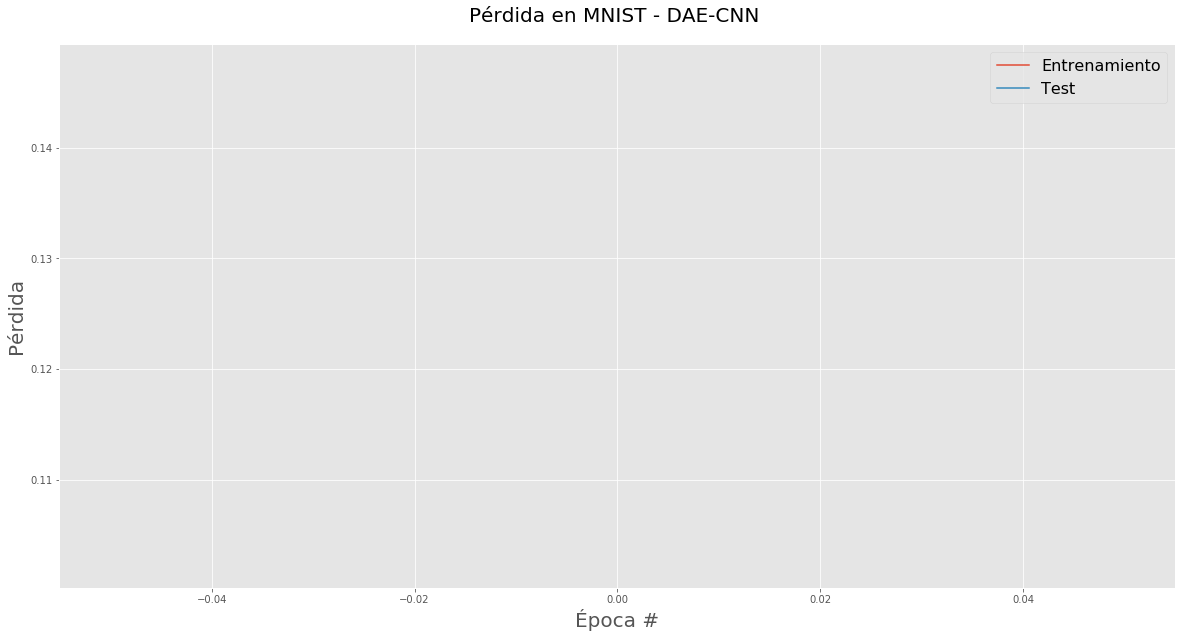

In [9]:
import matplotlib
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("MNIST - DAE-CNN - Ruido Sal y Pimienta",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

# Ruido sal

60000  train samples
10000  test samples


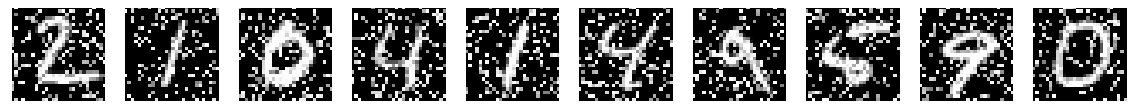

C:\Users\Spawn\Anaconda3\envs\Tesis\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

In [10]:
#Ruido salt
noise = augmenters.Salt(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)



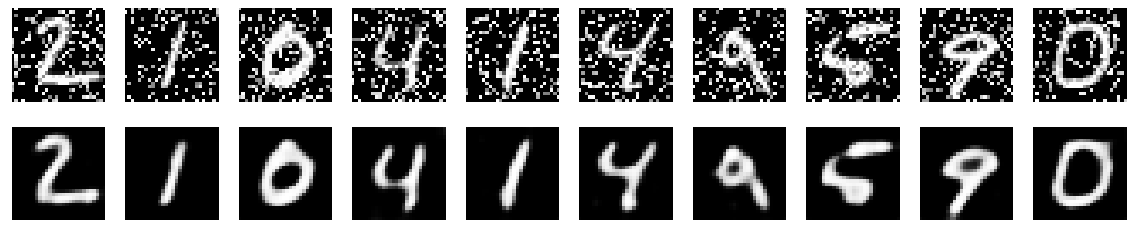

In [11]:
##se muestran imágenes comparativas
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("MNIST - DAE-CNN - Ruido Sal",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

# Ruido Pimienta

60000  train samples
10000  test samples


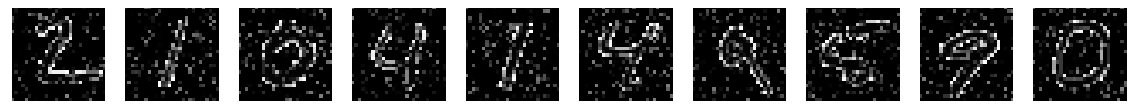

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

KeyboardInterrupt: 

In [34]:
#ruido pepper
noise = augmenters.Pepper(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

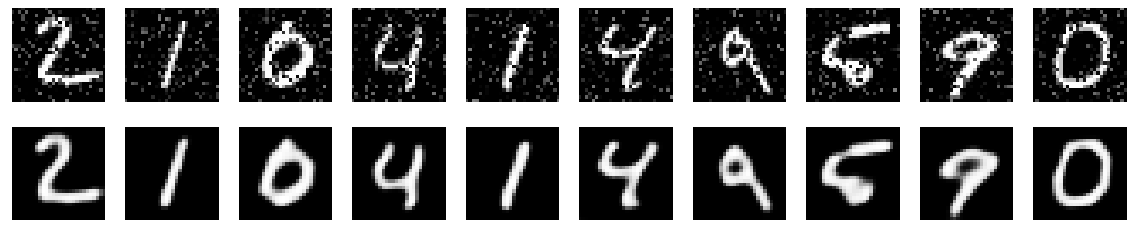

In [13]:
##se muestran imágenes comparativas
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("MNIST - DAE-CNN - Ruido Pimienta ",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

# Ruido aditivo gaussiano

60000  train samples
10000  test samples


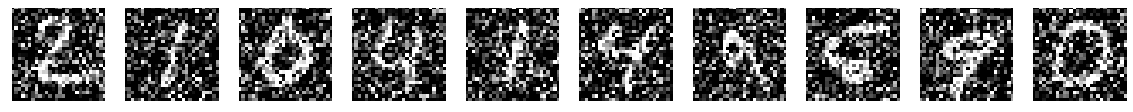

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

KeyboardInterrupt: 

In [36]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

In [ ]:
##se muestran imágenes comparativas
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("MNIST - DAE-CNN - Ruido Gaussiano",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

# Fashion MNIST
## Ruido sal y pimienta

60000  train samples
10000  test samples
60000  train samples
10000  test samples


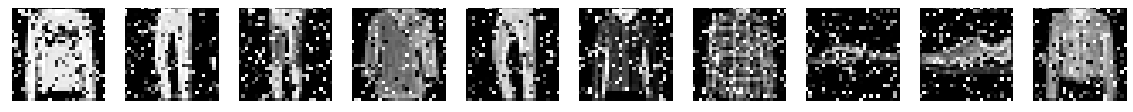

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

In [40]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# convert the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
noise = augmenters.SaltAndPepper(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

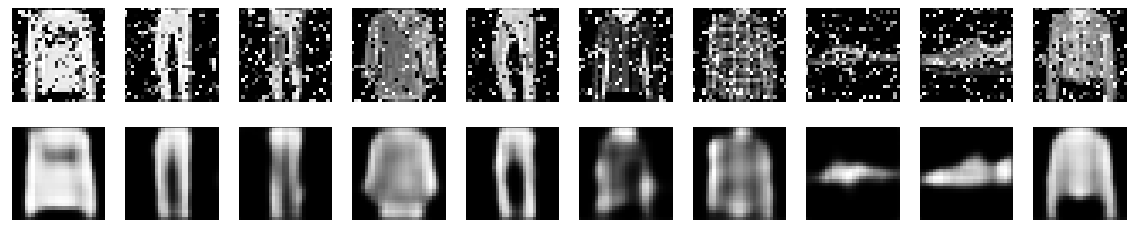

In [41]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("FashionMNIST - DAE-CNN -Ruido Sal y Pimienta",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

## Ruido sal

60000  train samples
10000  test samples


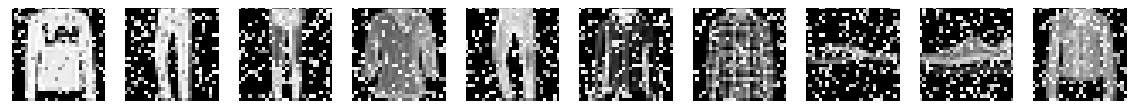

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

In [42]:
#Ruido salt
noise = augmenters.Salt(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)



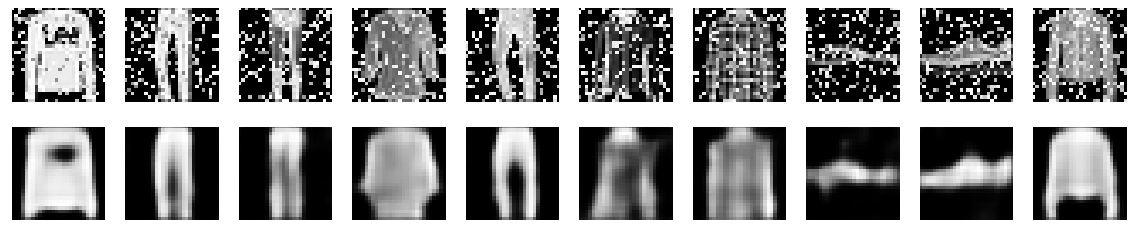

In [43]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("FashionMNIST - DAE-CNN -Ruido Sal",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

## Ruido pimienta

60000  train samples
10000  test samples


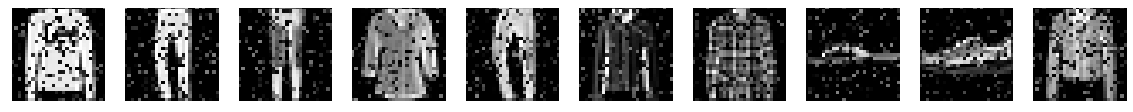

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

In [44]:
#ruido pepper
noise = augmenters.Pepper(0.2)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train * 255) / 255
x_test_noisy = seq_object.augment_images(x_test * 255) / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

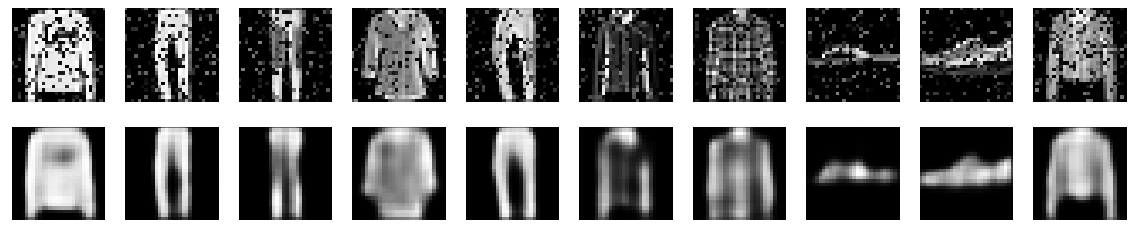

In [45]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("FashionMNIST - DAE-CNN -Ruido Pimienta",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})

## Ruido gaussiano

60000  train samples
10000  test samples


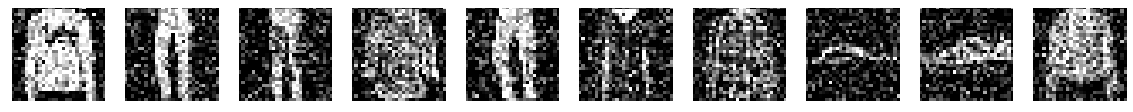

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0         
__________

KeyboardInterrupt: 

In [49]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


def DAE_CNN(features_shape, act='relu'):
    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x

    # Encoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv1')(o)
    o = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='en_conv2')(o)
    enc = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='en_pool2')(o)

    # Decoder
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv1')(enc)
    o = UpSampling2D((2, 2), name='upsampling1')(o)
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=(1, 1), name='de_conv2')(o)
    o = UpSampling2D((2, 2), name='upsampling2')(o)
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same', strides=(1, 1), name='de_conv3')(o)

    # Print network summary
    Model(inputs=x, outputs=dec).summary()

    return Model(inputs=x, outputs=dec)


batch_size = 128
epochs = 1

autoenc = DAE_CNN(input_shape, act=LeakyReLU(alpha=0.1))
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

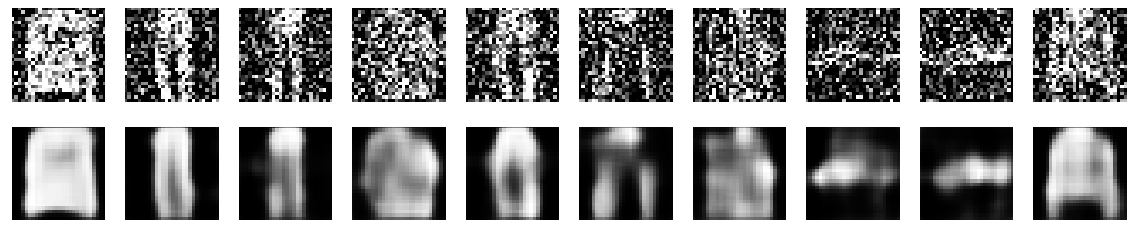

In [47]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
N=epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), hist.history["loss"], label="Entrenamiento")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="Test")
plt.title("FashionMNIST - DAE-CNN -Ruido Gaussiano",fontsize=20,y=1.03)
plt.xlabel("Época #",fontsize=20)
plt.ylabel("Pérdida",fontsize=20)
plt.legend(loc="upper right",prop={'size': 16})